In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [2]:
x_data = np.loadtxt('../data/dataset_plusMass_smallRadius.txt')
y_data = np.loadtxt('../data/parameterset_plusMass_smallRadius.txt')

# only keep first 5 columns of y_data
y_data = y_data[:, :5]

# Logarithmiere die Werte des dritten Arrays
y_data[:, 2] = np.log10(y_data[:, 2])
y_data[:, 4] = np.log10(y_data[:, 4])

# Skaliere die Werte von y_data (MinMaxScaler)
scaler = MinMaxScaler()
y_data = scaler.fit_transform(y_data)

In [3]:
# shuffle x and y but keep them in sync
np.random.seed(42)
np.random.shuffle(x_data)
np.random.seed(42)
np.random.shuffle(y_data)

### Explore y_data

In [4]:
y_data.shape

(16807, 5)

In [6]:
# count how many rows in y_data are duplicates in their first two columns
# and how many are unique
unique, counts = np.unique(y_data[:, :2], axis=0, return_counts=True)
print('unique:', unique.shape)
print('counts:', counts)

unique: (49, 2)
counts: [343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343
 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343 343
 343 343 343 343 343 343 343 343 343 343 343 343 343]


In [7]:
y_data.min(axis=0)

array([0., 0., 0., 0., 0.])

In [8]:
y_data.max(axis=0)

array([1., 1., 1., 1., 1.])

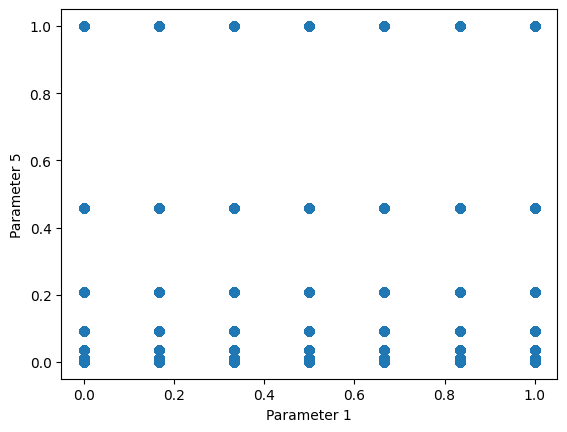

In [9]:
plt.scatter(x=y_data[:,0], y=y_data[:,4])
plt.xlabel('Parameter 1')
plt.ylabel('Parameter 5')
plt.show()

Insights:
- Values are not chosen randomly
- Each of the 4 targets has 10 unique values
- 10,000 samples because all values were combined with all others (10x10x10x10)

### Explore x_data

In [10]:
spectrum_length = int(x_data.shape[1]/3)
x_data.shape

(6561, 4302)

In [11]:
spectrum_length

1434

In [12]:
x_data.min()

-0.0017020069062709808

In [13]:
x_data.max()

358.67791748046875

In [14]:
def plot_spectra(indices):
    fig, axs = plt.subplots(3, 4, figsize=(10, 10))
    for i in range(3):
        axs[i, 0].set_ylabel('Sample {}'.format(i))
        axs[i, 0].plot(x_data[indices[i], :spectrum_length])
        axs[i, 1].plot(x_data[indices[i], spectrum_length:2*spectrum_length])
        axs[i, 2].plot(x_data[indices[i], 2*spectrum_length:])
        axs[i, 3].scatter(range(4), y_data[indices[i]])
        # fix y axis limits
        axs[i, 3].set_ylim([-0.05, 1.05])
    axs[0, 0].set_title('Spectrum 1')
    axs[0, 1].set_title('Spectrum 2')
    axs[0, 2].set_title('Spectrum 3')
    axs[0, 3].set_title('Parameters')
    plt.show()

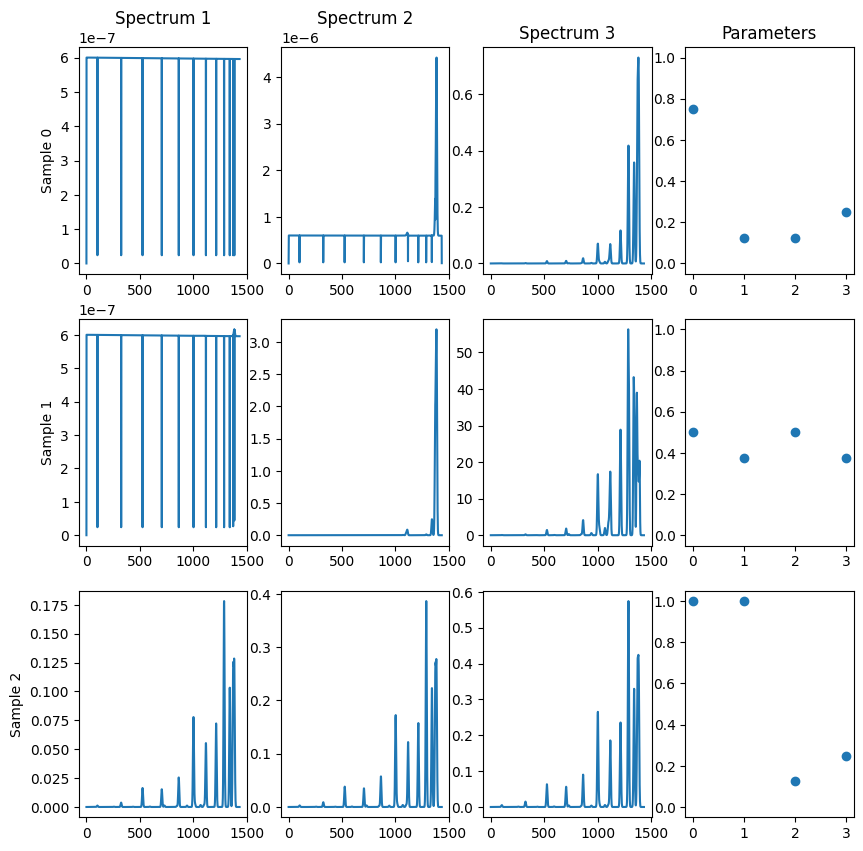

In [15]:
# plot some examples
indices = [100,101,102]
plot_spectra(indices)

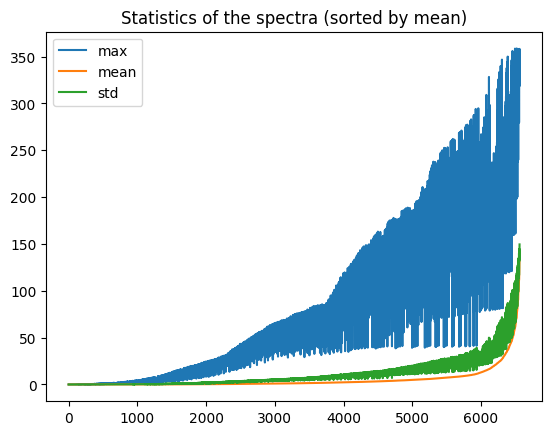

In [16]:
sorting = np.argsort(x_data.mean(axis=1))
plt.plot(x_data[sorting, :].max(axis=1))
plt.plot(x_data[sorting, :].mean(axis=1))
plt.plot(x_data[sorting, :].std(axis=1))
plt.legend(["max", "mean", "std"])
plt.title('Statistics of the spectra (sorted by mean)')
plt.show()

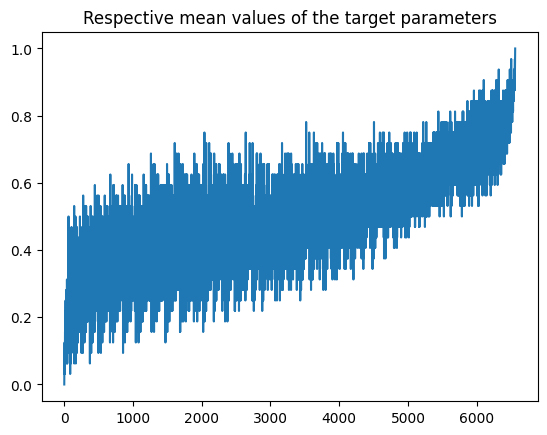

In [17]:
plt.plot(y_data[sorting, :].mean(axis=1))
plt.title("Respective mean values of the target parameters")
plt.show()

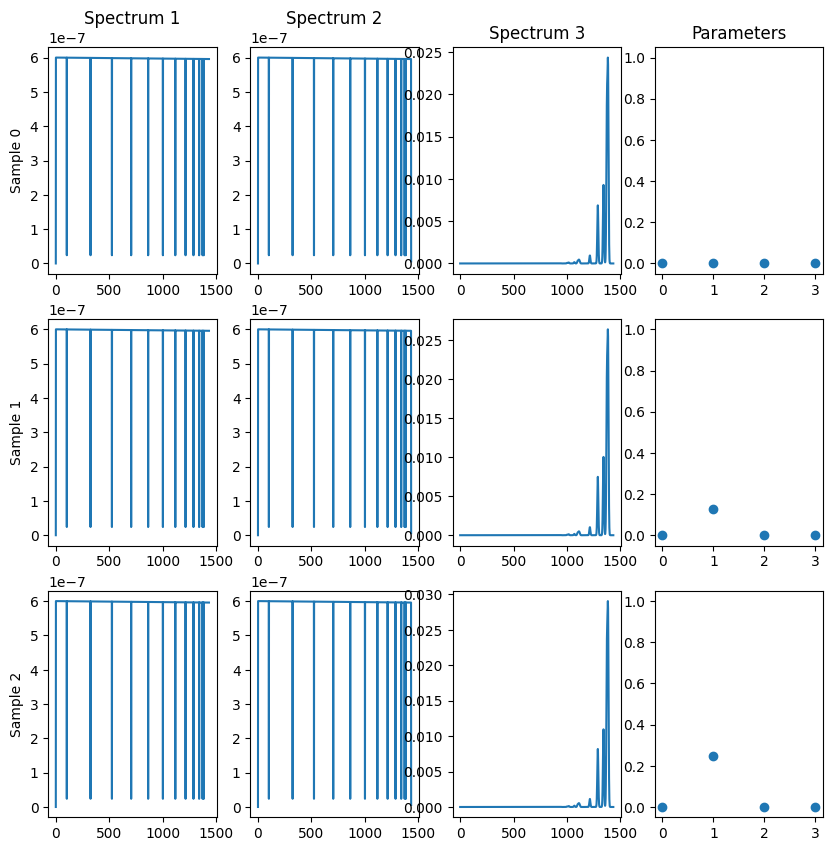

In [18]:
# look at first 3 samples with lowest x_data mean
indices = sorting[:3]
plot_spectra(indices)

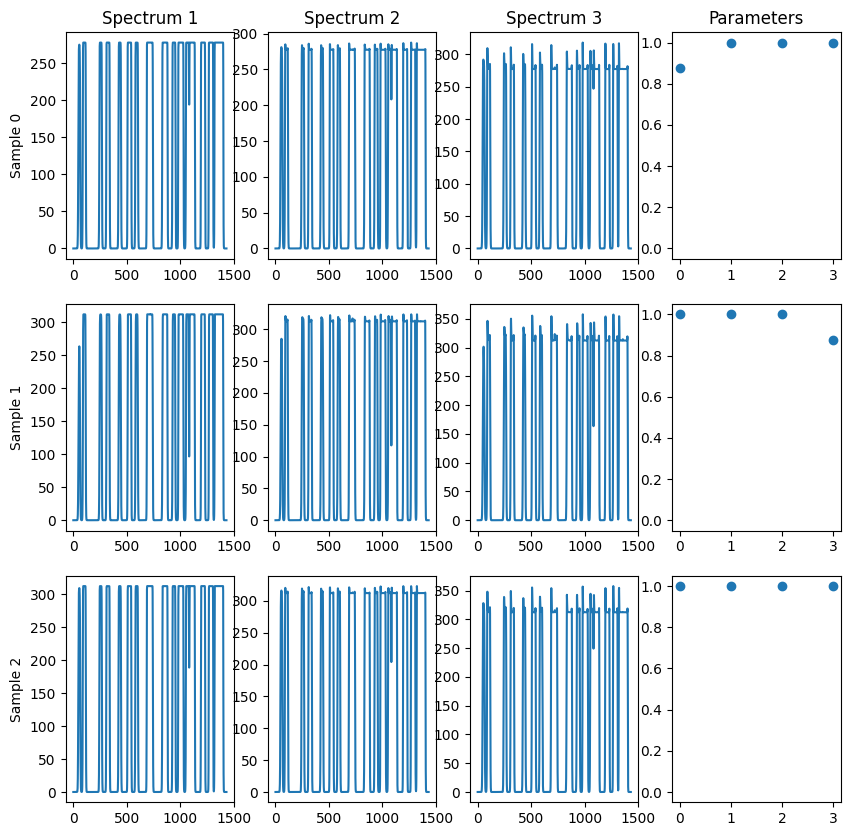

In [19]:
# look at last 3 samples with highest x_data mean
indices = sorting[-3:]
plot_spectra(indices)

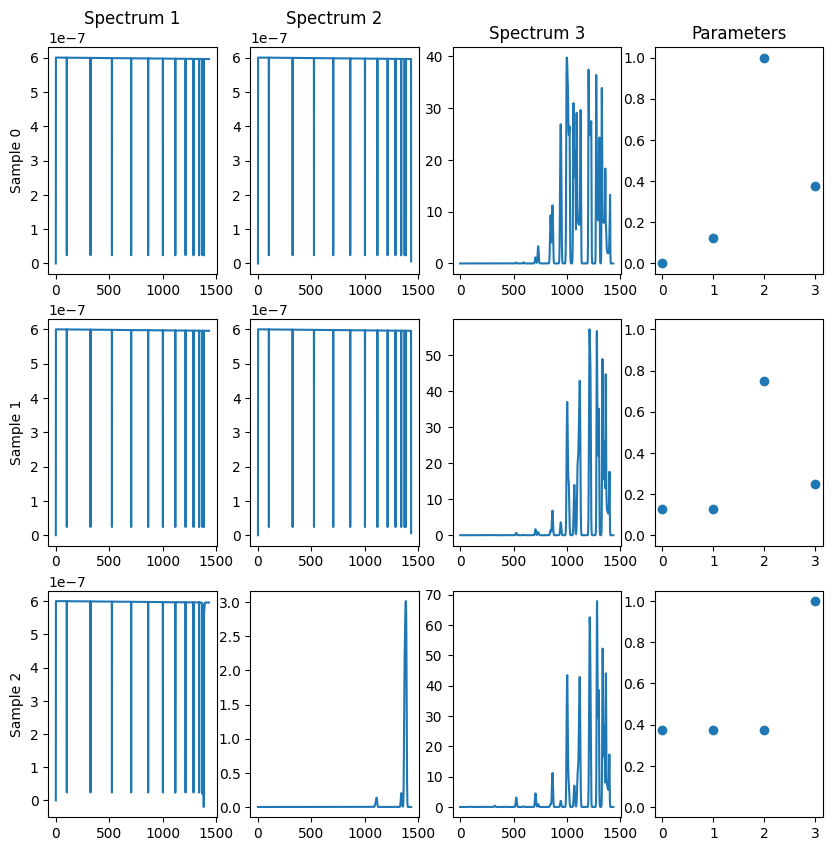

In [20]:
# look at center 3 samples with average x_data mean
indices = sorting[3279:3282]
plot_spectra(indices)